In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, linear_model, svm, ensemble, tree

In [2]:
def scatter(data):
    column1 = data.columns[0]
    column2 = data.columns[1]
    
    data.plot.scatter(column1, column2, fontsize = 14, figsize = (10, 7), sharex = False)
    plt.grid(linestyle = '--')
    
    plt.xlabel(column1, fontsize = 14, weight = 'bold')
    plt.ylabel(column2, fontsize = 14, weight = 'bold')
    return plt


def plot_anomaly(data, predicted, cmap = 'Set1'):
    data2 = data.copy()
    data2['Predicted'] = predicted
    
    '''normal = data2.loc[data2['Predicted'] == 1, :]
    anomalies = data2.loc[data2['Predicted'] == -1, :]'''
    
    # Make Scatterplot
    column1 = data.columns[0]
    column2 = data.columns[1]
    
    
    ax = data2.plot.scatter(column1, column2, c = 'Predicted',cmap = cmap, fontsize = 14, figsize = (10, 7), sharex = False)
    

    plt.grid(linestyle = '--')
    
    plt.xlabel(column1, fontsize = 14, weight = 'bold')
    plt.ylabel(column2, fontsize = 14, weight = 'bold')
    return ax

def plot_anomaly2(data, predicted, ax):
    data2 = data.copy()
    data2['Predicted'] = predicted
    
    normal = data2.loc[data2['Predicted'] == 1, :]
    anomalies = data2.loc[data2['Predicted'] == -1, :]
    
    # Make Scatterplot
    column1 = data.columns[0]
    column2 = data.columns[1]
    
    
    anomalies.plot.scatter(column1, column2, color = 'tomato', fontsize = 14,  sharex = False, ax=ax)
    normal.plot.scatter(column1, column2, color = 'grey', fontsize = 14,  sharex = False, ax = ax)

    #plt.grid(linestyle = '--')
    
    plt.xlabel(column1, fontsize = 14, weight = 'bold')
    plt.ylabel(column2, fontsize = 14, weight = 'bold')
    return ax

## Make Mock Data 1

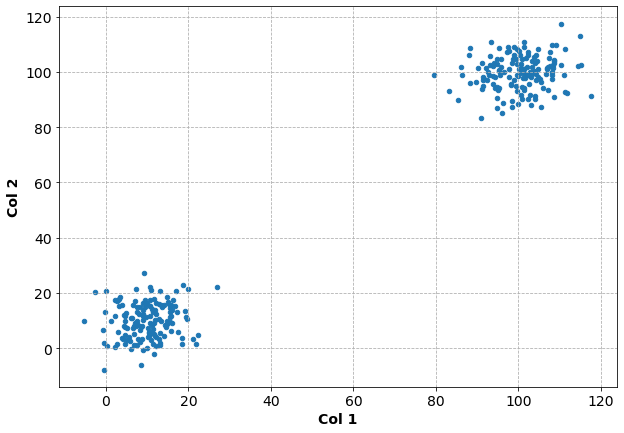

Adding Outliers


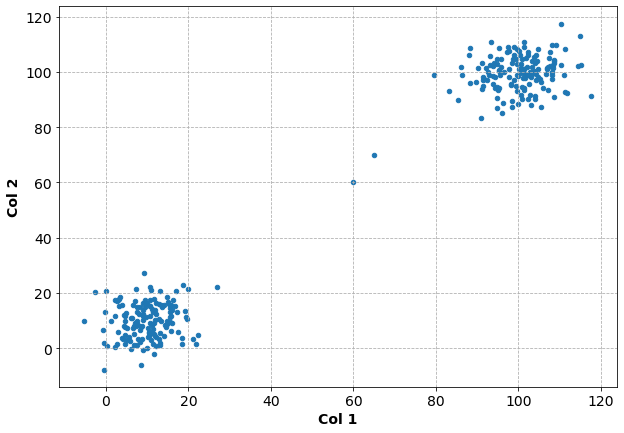

In [3]:
center1 = np.array([10, 10])
center2 = np.array([100, 100])
n_samples = 150

cluster1 = pd.DataFrame(center1 + np.random.normal(0, 6, (n_samples, 2)))
cluster2 = pd.DataFrame(center2 + np.random.normal(0, 6, (n_samples, 2)))

clean_data = pd.concat([cluster1, cluster2], axis = 0)
clean_data.columns = ['Col 1', 'Col 2']

# Visualize Clean Data
scatter(clean_data)
plt.show()

print('Adding Outliers')

outliers = pd.DataFrame([[60,60], [65, 70]], columns = ['Col 1', 'Col 2'])
all_data = pd.concat([clean_data, outliers], axis = 0)

scatter(all_data)
plt.show()

## Use One Class SVM

### -1 for Outliers, +1 for Inliers

In [4]:
scaler = preprocessing.StandardScaler().fit(all_data)
all_data1 = pd.DataFrame(scaler.transform(all_data), columns  =  all_data.columns)

In [5]:
gammas=np.logspace(-5, 0, 100)

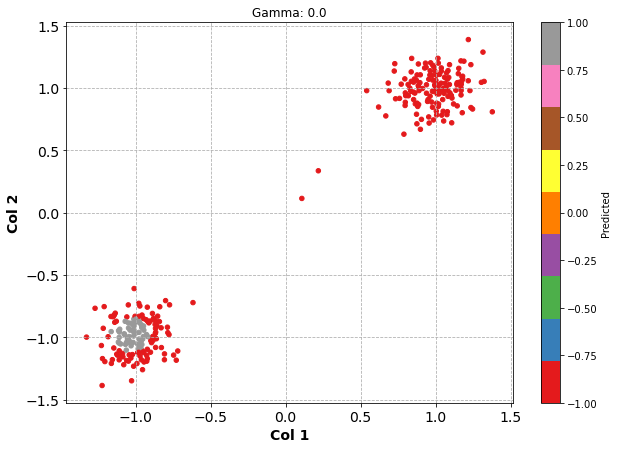

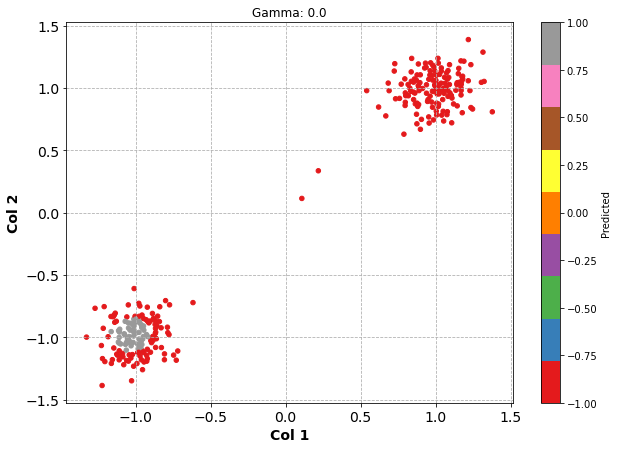

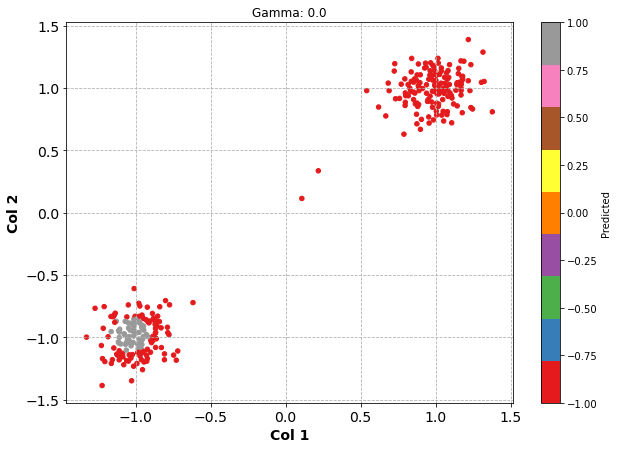

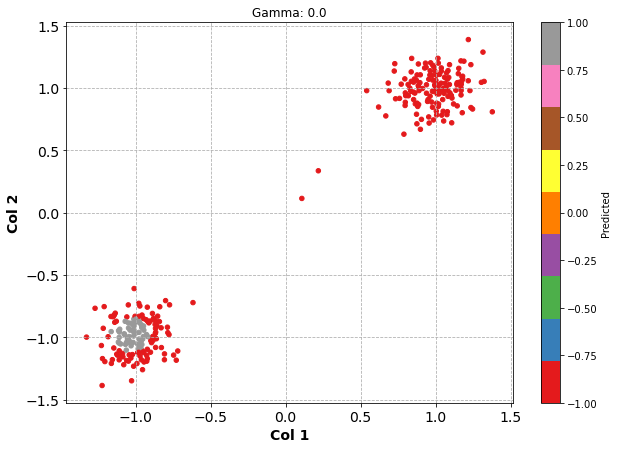

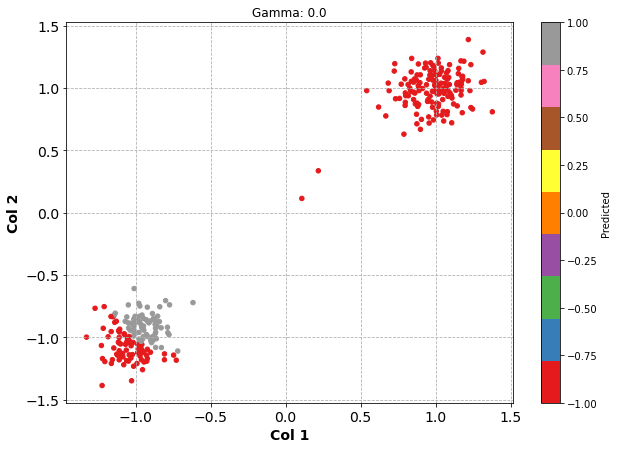

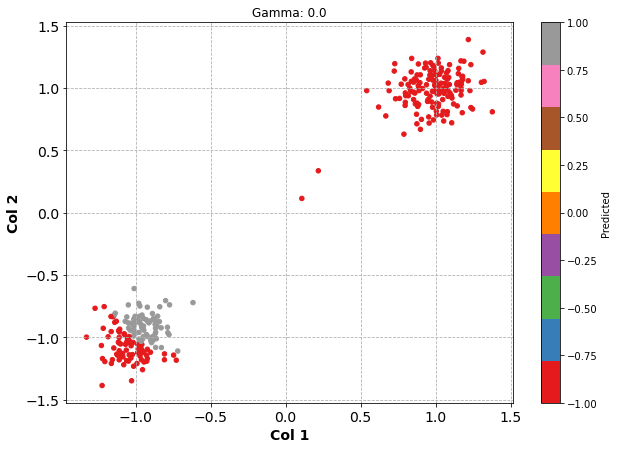

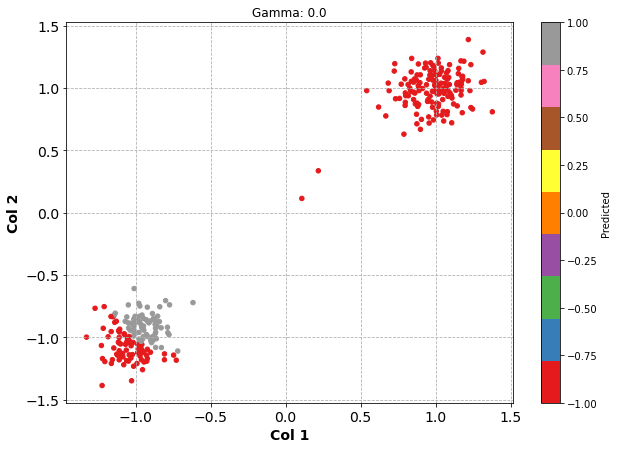

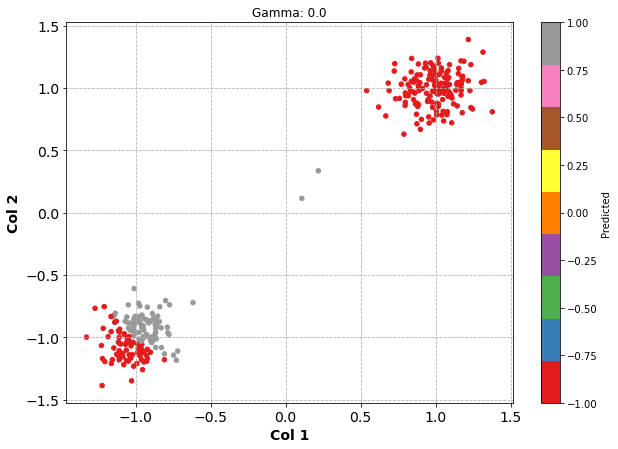

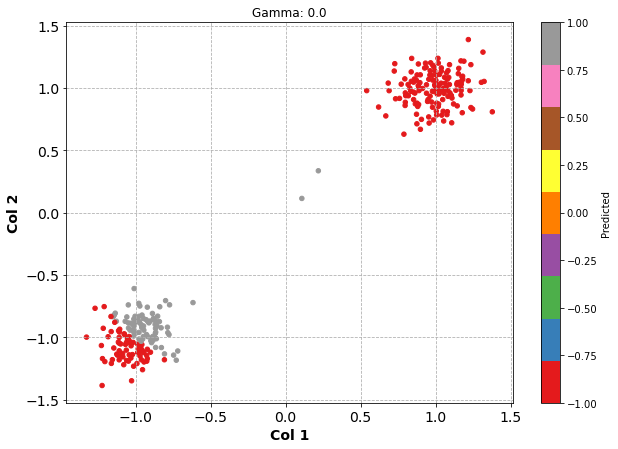

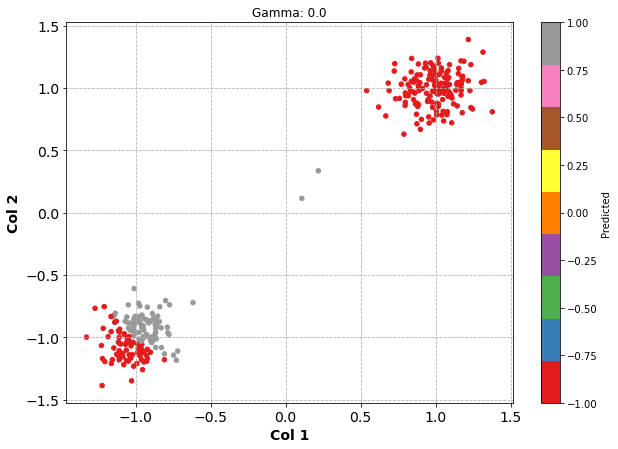

In [6]:
for i in range(10):
    gamma = gammas[i]
    model = svm.OneClassSVM(kernel='rbf', degree=5, gamma=gamma, coef0=0.0, tol=0.001, nu=0.02, 
                    shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(all_data1)

    plot_anomaly(data=all_data1, predicted=model.predict(all_data1))
    plt.title('Gamma: {}'.format(np.around(gamma, 4)))
    #plt.savefig('D:\\DS and ML\\anomaly\\'+str(i)+'.png', bbox_inches = 'tight')

### Visualize Decision Boundary of One Class SVM

In [92]:
x_fake  =  pd.DataFrame(np.random.uniform(-1.5, 1.5, (35000, 2)), columns = ['1', '2'])

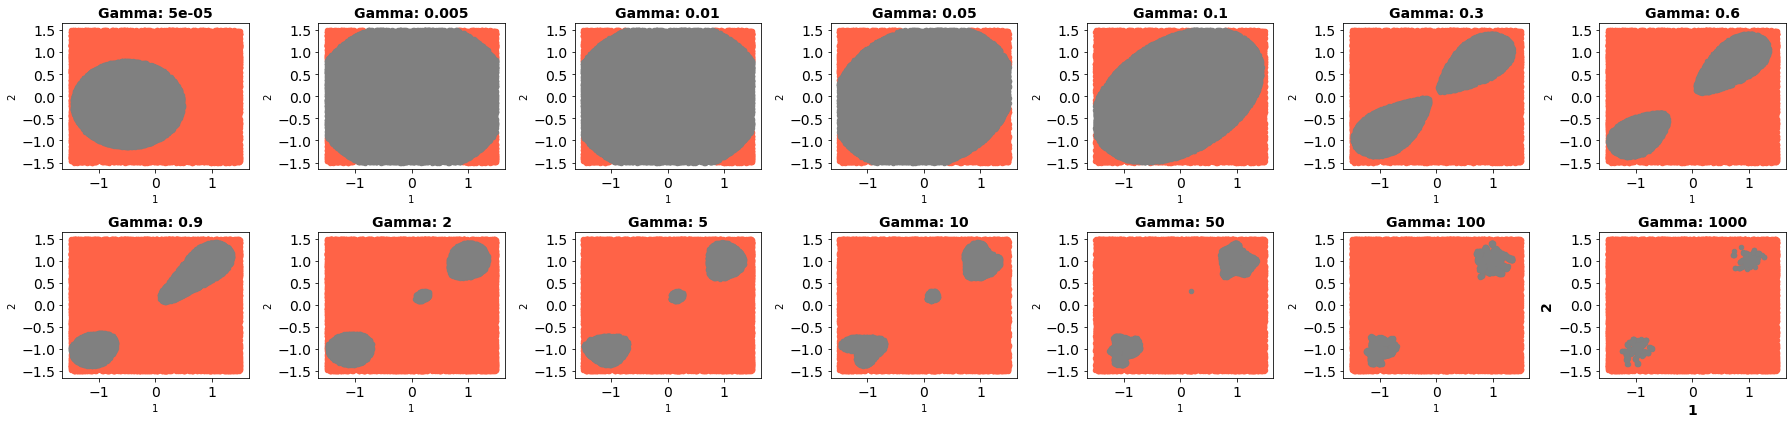

In [135]:
gammas = [.00005, .005, .01, .05, .1,.3, .6, .9, 2, 5, 10, 50, 100, 1000]
fig, axes = plt.subplots(2, 7, figsize = (25, 6), tight_layout = True)
for i, ax in zip(range(len(gammas)), axes.flatten()):
    gamma = gammas[i]
    model = svm.OneClassSVM(kernel='rbf', degree=5, gamma=gamma, coef0=0.0, tol=0.001, nu=0.01, 
                        shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(all_data1)

    
    
    model_predictions = model.predict(x_fake)
    #x_fake['Predictions'] = model_predictions

    ax = plot_anomaly2(x_fake, model_predictions,ax)
    ax.set_title('Gamma: {}'.format(np.around(gamma,6)), weight = 'bold', fontsize = 14)
plt.savefig('D:\\DS and ML\\anomaly\\'+str(i)+'.png', bbox_inches = 'tight')

In [8]:
model.predict(all_data1)

array([-1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

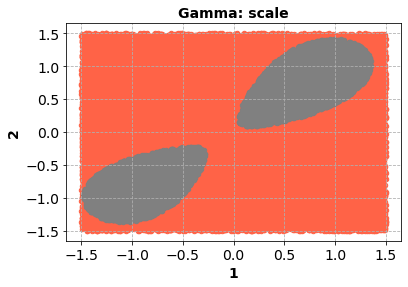

In [115]:
## Gamma = scale
model = svm.OneClassSVM(kernel='rbf', degree=5, gamma='scale', coef0=0.0, tol=0.001, nu=0.01, 
                        shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(all_data1)



model_predictions = model.predict(x_fake)
#x_fake['Predictions'] = model_predictions

fig, ax = plt.subplots(figsize = (6,4))
ax = plot_anomaly2(x_fake, model_predictions,ax)
ax.set_title('Gamma: {}'.format('scale'), weight = 'bold', fontsize = 14)
plt.savefig('D:\\DS and ML\\anomaly\\Defaultgamma.png', bbox_inches = 'tight')

In [148]:
gammas = [.00005, .005, .01, .05, .1,.3, .6, .9, 2,]
gammas = np.logspace(-5, 1, 200)
nos = []
for gamma in gammas:
    model = svm.OneClassSVM(kernel='rbf', degree=5, gamma=gamma, coef0=0.0, tol=0.001, nu=0.01, 
                        shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(all_data1)
    
    # Calculate the number of Inliers
    preds = x_fake.copy()
    preds['Prediction'] = model.predict(x_fake)
    preds.loc[preds['Prediction'] == -1, 'Prediction'] = 0
    
    no = preds.loc[:, 'Prediction'].sum()
    nos.append(no)
    print('Gamma: {} Done'.format(gamma))
    
    

Gamma: 1e-05 Done
Gamma: 1.0718913192051286e-05 Done
Gamma: 1.1489510001873086e-05 Done
Gamma: 1.231550603292826e-05 Done
Gamma: 1.3200884008314168e-05 Done
Gamma: 1.414991297434576e-05 Done
Gamma: 1.516716888470924e-05 Done
Gamma: 1.6257556664437934e-05 Done
Gamma: 1.742633386009651e-05 Done
Gamma: 1.867913599020781e-05 Done
Gamma: 2.0022003718155845e-05 Done
Gamma: 2.146141197858406e-05 Done
Gamma: 2.3004301197729168e-05 Done
Gamma: 2.465811075822604e-05 Done
Gamma: 2.643081486974103e-05 Done
Gamma: 2.833096101839324e-05 Done
Gamma: 3.0367711180354606e-05 Done
Gamma: 3.2550885998350565e-05 Done
Gamma: 3.489101213406774e-05 Done
Gamma: 3.739937302478794e-05 Done
Gamma: 4.008806328898465e-05 Done
Gamma: 4.297004704320844e-05 Done
Gamma: 4.6059220411451034e-05 Done
Gamma: 4.937047852839004e-05 Done
Gamma: 5.2919787359584364e-05 Done
Gamma: 5.672426068491978e-05 Done
Gamma: 6.080224261649427e-05 Done
Gamma: 6.51733960488242e-05 Done
Gamma: 6.985879746785249e-05 Done
Gamma: 7.488103857590

"\ndf = pd.DataFrame()\ndf['gammas'] = gammas\ndf['nos'] = nos\n\nmax_arg = df.diff()['nos'].argmin()\n\nplt.plot(df.loc[max_arg, 'gammas'], df.loc[max_arg, 'nos'], marker = 'v')\nplt.title('Best Gamma: {}'.format(df.loc[max_arg, 'gammas']))"

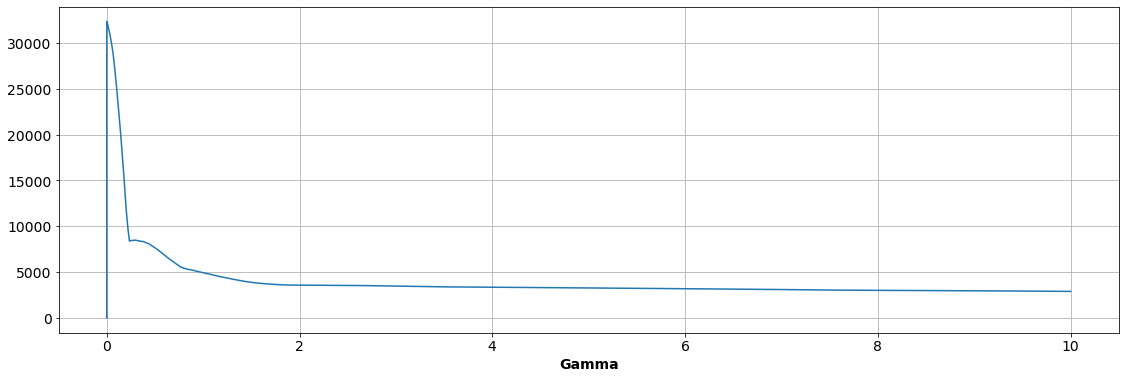

In [171]:
plt.figure(figsize = (19, 6))
plt.plot(gammas, nos)
plt.xlabel('Gamma', fontsize=14, weight='bold')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
'''
df = pd.DataFrame()
df['gammas'] = gammas
df['nos'] = nos

max_arg = df.diff()['nos'].argmin()

plt.plot(df.loc[max_arg, 'gammas'], df.loc[max_arg, 'nos'], marker = 'v')
plt.title('Best Gamma: {}'.format(df.loc[max_arg, 'gammas']))'''

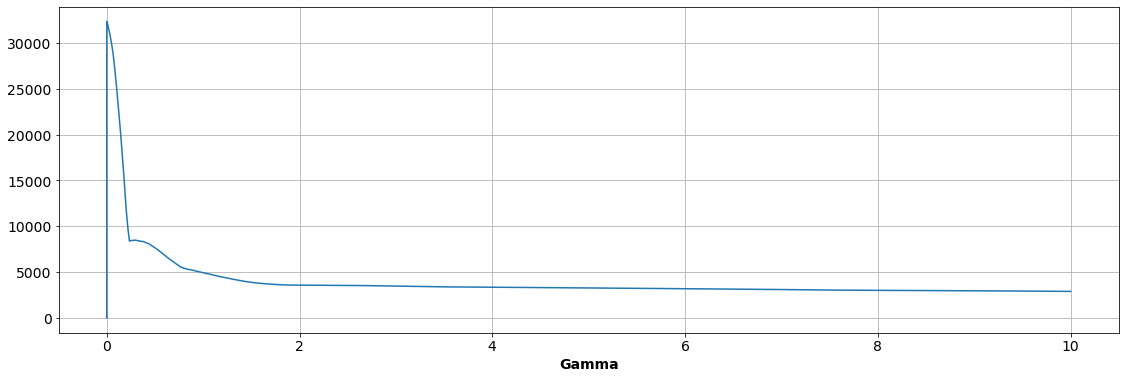

In [173]:
plt.figure(figsize = (19, 6))
plt.plot(gammas, nos)
plt.xlabel('Gamma', fontsize=14, weight='bold')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.savefig('D:\\DS and ML\\anomaly\\GammaCurve.png', bbox_inches = 'tight')

### Custom Gamma

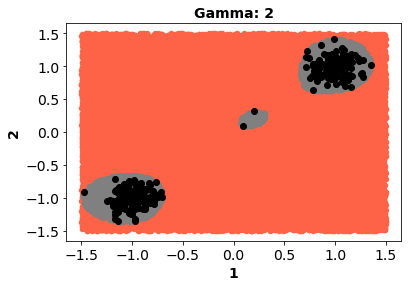

In [172]:
## Gamma = scale
gamma=2
model = svm.OneClassSVM(kernel='rbf', degree=2, gamma=gamma, coef0=0.0, tol=0.001, nu=0.01, 
                        shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(all_data1)



model_predictions = model.predict(x_fake)
#x_fake['Predictions'] = model_predictions

fig, ax = plt.subplots(figsize = (6,4))
ax = plot_anomaly2(x_fake, model_predictions,ax)
ax.scatter(all_data1.iloc[:, 0], all_data1.iloc[:, 1], color='k')
ax.set_title('Gamma: {}'.format(gamma), weight = 'bold', fontsize = 14)
#plt.savefig('D:\\DS and ML\\anomaly\\Customgamma.png', bbox_inches = 'tight')